In [1]:
#  MNIST tutorial (handwritten printed digits recognition tutorial)
#  modified from
#  https://elitedatascience.com/keras-tutorial-deep-learning-in-python
#  for SDSC SI2019

# ----------- IMPORT STATEMENTS ---------------
import numpy as np
np.random.seed(1)  # for reproducibility

from keras.models import Sequential               #Sequential models are the standard stack of layers models
from keras.layers import Dense, Dropout, Activation, Flatten   #These are core layer specification functions
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D           #These are convolution layer functions
from keras.utils import np_utils                         #Some utilities
from keras import optimizers                             #For training algorithm

from keras import backend as K    #backend is tensorflow

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
#---------------------------------------------
print('import done')

Using TensorFlow backend.


import done


In [2]:
#--------------- LOAD and PREPARE DATA STATEMENTS ----------------
# Load some numpy arrays that have the MNIST data
#  (these are subsets extracted from the MNIST data set in Keras)
X_train=np.load('X_train5k.npy')
Y_train=np.load('Y_train5k.npy')
X_test =np.load('X_test.npy')
Y_test =np.load('Y_test.npy')

print(X_train.shape)     #review the dimensions Note python3 uses print(X..) python 2 uses print X...

#save a few training images with the label in the file name 
from PIL import Image
for i in range(0,2):
   im = Image.fromarray(X_train[i,:,:])
   im.save("Xtrain_num"+str(i)+"_cat_"+str(Y_train[i])+".jpeg")
print('img load done')

(5000, 28, 28)
img load done


In [3]:
# --------- Reshape input data ------------
#  b/c Keras expects N-3D images (ie 4D matrix)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test  = X_test.reshape(X_test.shape[0],   1, 28, 28)

#To confirm, we can print X_train's dimensions again:
print(X_train.shape)

#convert and put into 0-1 range
X_train  = X_train.astype('float32')
X_test   = X_test.astype('float32')
X_train /= 255
X_test  /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test  = np_utils.to_categorical(Y_test,  10)

# ------------- End loading and preparing data --------------
np.amax(X_train)   #this gets the max value over a flattened numpy array
print('prep done')

(5000, 1, 28, 28)
prep done


In [31]:
# --------------Set up Model ---------------------
mymodel = Sequential()

numfilters = 16  #<<<< -------- EXERCISE: you can try 4,8, for comparison

#     input shape for 1 image, channels refers to color dimension of input image
mymodel.add(Convolution2D(numfilters, (16,16),strides=1,  data_format="channels_first",activation='relu', input_shape=(1,28,28))) 
#                                       /\ 
#                                       /\
#                                       |--------EXERCISE try changing this to 9,9 for example 
 
print('modeldef and first conv layer done')


modeldef and first conv layer done


In [32]:
mymodel.layers[0].output # use this to check sizes of output  

<tf.Tensor 'conv2d_5/Relu:0' shape=(?, 16, 13, 13) dtype=float32>

In [33]:
#-----------------Now add more Convolution layers
mymodel.add(Convolution2D(numfilters, (3, 3), strides=1, data_format="channels_first", activation='relu'))

mymodel.add(MaxPooling2D(pool_size=(2,2),strides=2,data_format="channels_first")) #get Max over 2D region,and slide
mymodel.add(Dropout(0.25))
 
mymodel.add(Flatten())            #reorganize 2DxFilters output into 1D
print('added more layers')

added more layers


In [34]:
mymodel.layers[1].output   #size of output layer for max pooling

<tf.Tensor 'conv2d_6/Relu:0' shape=(?, 16, 11, 11) dtype=float32>

In [35]:
#----------------Now add final classification layers
mymodel.add(Dense(32, activation='relu'))  #enter number of hidden units (no good rule, but start with ~ num of previous output) 

#                /\ 
#                /\
#                |--------EXERCISE try changing this to 8 or 16, 


mymodel.add(Dropout(0.5))
mymodel.add(Dense(10, activation='softmax'))
print('assemble model done')

assemble model done


In [36]:
# --------- Now assemble (ie compile TensorFlow commands) and run -----
mymodel.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])
print('compiled')

compiled


In [37]:
mymodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 16, 13, 13)        4112      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 11, 11)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 5, 5)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 5, 5)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                12832     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
__________

In [41]:
#------------ Now Run Training
mymodel.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)  #batch up 32 examples before adjusting weights,
                                                #sweep through training data 'epochs' times


Epoch 1/10
5000/5000 [==============================] - 1s 237us/step - loss: 0.4249 - acc: 0.8720
Epoch 2/10
5000/5000 [==============================] - 1s 237us/step - loss: 0.4114 - acc: 0.8682
Epoch 3/10
5000/5000 [==============================] - 1s 238us/step - loss: 0.4226 - acc: 0.8686
Epoch 4/10
5000/5000 [==============================] - 1s 236us/step - loss: 0.4145 - acc: 0.8744
Epoch 5/10
5000/5000 [==============================] - 1s 236us/step - loss: 0.4041 - acc: 0.8744
Epoch 6/10
5000/5000 [==============================] - 1s 237us/step - loss: 0.3931 - acc: 0.8786
Epoch 7/10
5000/5000 [==============================] - 1s 234us/step - loss: 0.3769 - acc: 0.8816
Epoch 8/10
5000/5000 [==============================] - 1s 236us/step - loss: 0.3771 - acc: 0.8866
Epoch 9/10
5000/5000 [==============================] - 1s 238us/step - loss: 0.3740 - acc: 0.8848
Epoch 10/10
5000/5000 [==============================] - 1s 236us/step - loss: 0.3626 - acc: 0.8890


In [40]:
#--------- Get overall prediction score
trainscore = mymodel.evaluate(X_train, Y_train, verbose=1) # get overal score
testscore  = mymodel.evaluate(X_test, Y_test, verbose=1) # get overal score
#somepred  = mymodel.predict(X_test,verbose=0)           # get predicted labels
print(trainscore)
print(testscore)

10000/10000 [==============================] - 1s 88us/step
[0.18565737035870553, 0.9494]
[0.2338595783829689, 0.9306]


In [28]:
#-----------Optional: View some of the output
#print(somepred[1:3])
#Notice each row is 10 elements, each element is a prediction of the number labels 
print(Y_test[1:3])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


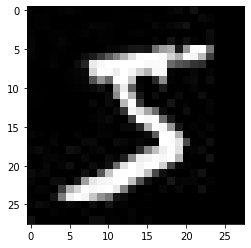

In [29]:
#To view a sample image
import matplotlib.pyplot as plt      #These provide matlab type of plotting functions
import matplotlib.image as mpimg

img_filename = "Xtrain_num0_cat_5.jpeg" #% scriptDir 
#img_filename = "Xtrain_num1_cat_0.jpeg" #% scriptDir 
im = mpimg.imread(img_filename)
plt.figure()
plt.imshow(im,'gray')
plt.show()
#print('im loaded')

W3D shape Wlist[0]:(16, 16, 16)
4.0


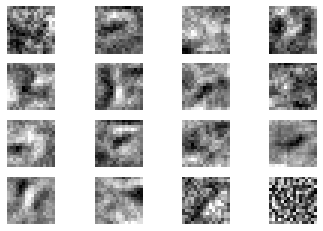

done plotting weights mosaic


In [42]:
# ------------ GET WEIGHTS From Convolution Layer and make mosaic image 
Wlist   =mymodel.layers[0].get_weights()      
W3D     =np.squeeze(Wlist[0])
print("W3D shape Wlist[0]:"+str(W3D.shape))
W3Dchan =W3D.swapaxes(1,2).swapaxes(0,1)  #get the channels as 1st dimension;

Wmin       =np.amin(W3Dchan)
Wmax       =np.amax(W3Dchan-Wmin)
Wsc        =np.int_(255*(W3Dchan-Wmin)/Wmax)
ncol =4
nrow =np.ceil(numfilters/ncol)
print(nrow)
plt.figure()
for i in range(Wsc.shape[0]):
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(Wsc[i],'gray')
   plt.axis('off')
#plt.savefig("test.png", bbox_inches='tight')
plt.show()
print('done plotting weights mosaic')

In [43]:
#  ---------------- NOW Visualize the activations for the first training example --------

get_layer_output = K.function([mymodel.layers[0].input],[mymodel.layers[0].output]) #set up function

                  #use [0] for input '5' and [1] for input '0' examples
                  #                    ---V
x                = np.expand_dims(X_train[0],0)           #set up a 4D input of 1 image training set 
layer_output     = get_layer_output([x])[0]                #get output using K.function

layer_output.shape    #check output shape and use it in next cell, first dimension is number of filters



(1, 16, 13, 13)

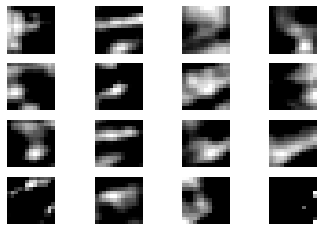

done plotting layer activation output mosaic


In [44]:
# --- Now output a mosaic of layer 0 output
layeroutput3D      = np.squeeze(layer_output)      
ncol =4
nrow =np.ceil(numfilters/ncol)
plt.figure()
for i in range(layeroutput3D.shape[0]):
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(layeroutput3D[i],'gray')
   plt.axis('off')
#plt.savefig("test.png", bbox_inches='tight')
plt.show()
print('done plotting layer activation output mosaic')


In [ ]:
#Set up function to get layer 1 output from layer 0 output

get_layer1_output = K.function([mymodel.layers[1].input],[mymodel.layers[1].output]) #set up function
layer1_output     = get_layer1_output([layer_output])[0]                             #get output using K.function
layer1_output.shape

In [ ]:
# --- Now output a mosaic of layer 1
layeroutput3D      = np.squeeze(layer1_output)      
ncol =4
nrow =np.ceil(numfilters/ncol)
plt.figure()
for i in range(layeroutput3D.shape[0]):
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(layeroutput3D[i],'gray')
   plt.axis('off')
#plt.savefig("test.png", bbox_inches='tight')
plt.show()
print('done plotting layer1 activation output mosaic')


In [ ]:
#Set up function to get layer 1 output from layer 0 output

get_layer2_output = K.function([mymodel.layers[2].input],[mymodel.layers[2].output]) #set up function
layer2_output     = get_layer2_output([layer1_output])[0]                             #get output using K.function
layer2_output.shape

In [ ]:
# --- Now output a mosaic of layer 1
layeroutput3D      = np.squeeze(layer2_output)      
ncol =4
nrow =np.ceil(numfilters/ncol)
plt.figure()
for i in range(layeroutput3D.shape[0]):
   plt.subplot(nrow,ncol,i+1)
   plt.imshow(layeroutput3D[i],'gray')
   plt.axis('off')
#plt.savefig("test.png", bbox_inches='tight')
plt.show()
print('done plotting layer2 max pool output mosaic')
